[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/roots.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/roots.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

# Root finding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

## Bisection Method

The first step is always to lay out a structure plan of the algorithm.

**Input arguments:** function $f$ (handle), initial interval $[a, b]$, precision tol, maximum number of iterations nmax (optional).

**Termination criterion:** $|a_n - b_n| < tol$

In [2]:
def bisection(f, a, b, tol, nmax=1000):
    """
    Implements the bisection method to find a root of the function f
    in the interval [a, b] with precision tol.
    Optionally, the number of iterations may be limited to nmax.
    Returns the root approximation and the number of iterations needed.
    """
    if f(a)*f(b) > 0:
        raise Exception('Not a suitable initial interval')
    n = 0
    while (abs(a - b) > tol) & (n < nmax):
        n = n + 1
        c = (a + b)/2
        if f(c)*f(a) > 0:
            a = c
        else:
            b = c
    return (a + b)/2, n  # Return the midpoint of the last interval

Here's a test case:

In [3]:
f1 = lambda x: 2*x - np.tan(x)

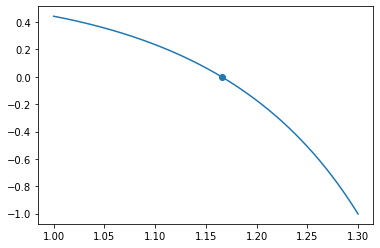

In [4]:
x = np.linspace(1, 1.3, 200)
x0, _ = bisection(f1, .5, 1.5, 1e-6)
fig, ax = plt.subplots()
ax.plot(x, f1(x))
ax.scatter(x0,0)
plt.show()

The bisection method does not always work, e.g. for a function with  $f(x) \geq 0 \;\forall \;x\in\mathbf{R}$ and $f(0) = 0,$ e.g. $f(x) = x^2$.

## Newton's method

**Input arguments:** function $f$ (handle), initial value $x_0$, precision tol, derivative df (handle, optional), maximum number of iterations nmax (optional). 

If not supplied, the derivative should be approximated numerically using a difference quotient.

**Termination criterion:** $|x_n - x_{n-1}| < tol$. Other criteria are possible, e.g. the relative error $\frac{|x_n - x_{n-1}|}{|x_n|}$ or the size of the function value $|f(x_n)|$.


In [5]:
def newton(f, x0, tol, df=None, nmax=100):
    """
    Implements Newton's method to find a root of the real function f
    with initial guess x0 and (absolute) error tolerance tol.
    
    Optionally, the derivative df of f may be passed, otherwise this will
    be approximated using a difference quotient.
    A further optional parameter is the maximum number of iterations, nmax
    
    Returns the approximation to the root and the number of iterations needed.
    """
    x = x0
    dx = np.inf 
    n = 0
    while (abs(dx) > tol) & (n <= nmax): 
        n = n + 1
        if df is None:
            h = x*1e-8
            dfx = (f(x + h) - f(x))/h
        else:
            dfx = df(x);
        dx = -f(x)/dfx;
        x = x + dx;
        print(f'n={n}, x={x}, f(x)={f(x)}')
    return x, n

In [6]:
f1 = lambda x: 2*x - np.tan(x)
df1 = lambda x: 1 - np.tan(x)**2 # df1/dx

n=1, x=1.3104780300916217, f(x)=-1.133327685248926
n=2, x=1.2239290964998213, f(x)=-0.31852867701817456
n=3, x=1.1760509000038353, f(x)=-0.0482071179322201
n=4, x=1.1659265083113626, f(x)=-0.0016218942442924877
n=5, x=1.1655616363485986, f(x)=-2.000423291459441e-06
n=6, x=1.1655611852078998, f(x)=-3.0526692285093304e-12


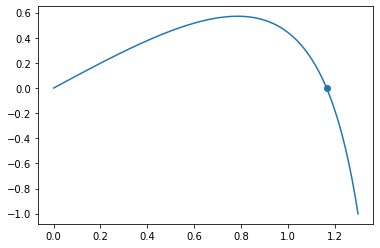

In [7]:
x = np.linspace(0, 1.3, 200)
x0, _ = newton(f1, 1, 1e-6, df1)
fig, ax = plt.subplots()
ax.plot(x, f1(x))
ax.scatter(x0,0)
plt.show()

### Convergence of Newton's method

The convergence of Newton's method depends on the initial value:

In [8]:
newton(f1, 1, 1e-6, df1)     # convergence to the desired root

n=1, x=1.3104780300916217, f(x)=-1.133327685248926
n=2, x=1.2239290964998213, f(x)=-0.31852867701817456
n=3, x=1.1760509000038353, f(x)=-0.0482071179322201
n=4, x=1.1659265083113626, f(x)=-0.0016218942442924877
n=5, x=1.1655616363485986, f(x)=-2.000423291459441e-06
n=6, x=1.1655611852078998, f(x)=-3.0526692285093304e-12


(1.1655611852078998, 6)

In [9]:
newton(f1, 0.5, 1e-6, df1)   # convergence to the other root x=0

n=1, x=-0.1467039965130117, f(x)=-0.14564239893582218
n=2, x=0.0021894416284372054, f(x)=0.00218943812995482
n=3, x=-6.997011727828684e-09, f(x)=-6.997011727828684e-09
n=4, x=0.0, f(x)=0.0


(0.0, 4)

In [10]:
newton(f1, 0.8, 1e-6, df1)   # divergence

n=1, x=10.281442120236282, f(x)=19.409134760545374
n=2, x=68.89489881764426, f(x)=138.01356360156728
n=3, x=-76.39342670228335, f(x)=-151.2457561106143
n=4, x=-186.39187066143634, f(x)=-371.0882764607345
n=5, x=-384.3477326894354, f(x)=-766.8534684463111
n=6, x=-704.8110116282344, f(x)=-1407.6848639843618
n=7, x=-1216.2155020638934, f(x)=-2431.985456551073
n=8, x=1818.1248847936622, f(x)=3637.404912825623
n=9, x=12696.966568440681, f(x)=25398.40798381774
n=10, x=14032.020574232858, f(x)=28074.31946213341
n=11, x=14300.305343567756, f(x)=28600.838947546305
n=12, x=-15872.628392500696, f(x)=-31741.622177856683
n=13, x=-18472.191266267128, f(x)=-36944.7744702179
n=14, x=25177.89814263472, f(x)=50353.40563996421
n=15, x=35856.886539094165, f(x)=71716.80297613061
n=16, x=44623.92012096489, f(x)=89246.93068641995
n=17, x=-472124.17751712113, f(x)=-944249.1146859836
n=18, x=1760516.7549991217, f(x)=3521033.877460665
n=19, x=-2310177.3800738826, f(x)=-4620353.393579664
n=20, x=-7636181.7388576

(4.5879391520565e+37, 101)

We see that one should not use an initial guess close to a local extremum of the function.

### [Root finding in SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.html)

Basic [bisection routine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect) to find a zero of the function $f$ between the arguments $a$ and $b$. $f(a)$ and $f(b)$ cannot have the same signs.

In [11]:
f = lambda x: x**2 - 1
optimize.bisect(f, 0, 2)

1.0

Find a zero of the function func given a nearby starting point x0. The [Newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)-Raphson method is used if the derivative fprime of func is provided, otherwise the secant method is used.

In [12]:
f = lambda x: x**3 - 1  # only one real root at x = 1
optimize.newton(f, 1.5)

1.0000000000000016

In [13]:
optimize.newton(f, 1.5, fprime2=lambda x: 6 * x)

1.0000000000000016

Let's try our example from above: 

In [14]:
optimize.newton(f1, 1, fprime2=df1)

1.1655611852072112

In [15]:
optimize.newton(f1, 0.5, fprime2=df1)

-4.301335946388084e-18

This even works for $x_0 = 0.8$, for which our Newton's method failed:

In [16]:
optimize.newton(f1, 0.8, fprime2=df1)

-1.917499110939307e-25

To find the roots of a polynomial, the function roots from numpy can be used. It takes as an argument the vector of coefficients of the polynomial:

$p(x)=xˆ2+2x+3$

In [17]:
np.roots([1, 2, 3])

array([-1.+1.41421356j, -1.-1.41421356j])

$p(x)=4x^4+2x+1$

In [18]:
np.roots([4, 0, 0, 2, 1])

array([ 0.52610832+0.71720543j,  0.52610832-0.71720543j,
       -0.52610832+0.19798058j, -0.52610832-0.19798058j])

## Systems of (nonlinear) equations: the Newton-Raphson method

We want to find a zero $x_0$ of a function $f:\mathbf{R}^n \to \mathbf{R}^n$. As in Newton's method, we replace $f$ by its linear approximation close to the zero $x_0$:

$$f(x) \approx f(x_0) + J(x_0) (x-x_0),$$

where $J$ is the Jacobi matrix of $f$. Using $f(x_0) = 0$, solving for $x$ and iterating this yields

$$x_{k+1} = x_k + \delta x_k, \qquad J(x_k) \delta x_k = f(x_k).$$

This linear system needs to be solved at each step of the Newton-Raphson iteration. 

In [19]:
def newtonr(f, x0, tol, J, nmax=100):
    """
    Implements the Newton-Raphson method to find a zero of a function
    f:R^n->R^n with initial guess x0, error tolerance tol and maximum number
    of iterations nmax is (optional). Requires the Jacobi matrix J of f.
    """
    x = x0
    dx = np.full_like(x0, 1)  # only for initialisation
    n = 0
    while (np.linalg.norm(dx) > tol) & (n <= nmax):
        n = n + 1
        Jx = J(x)
        dx = np.linalg.solve(-Jx, f(x))
        #dx = np.linalg.lstsq(-Jx, f(x))
        x = x + dx
    return x

**Example:** Intersection of a circle with radius $r=2$ around the origin and an ellipse with semi-major axes $a=3,b=2$ centred at the point (3,1). The coordinates of the circle (c) and the ellipse (e) are given in terms of the polar angle by

In [20]:
xc = lambda t: 2*np.cos(t)
yc = lambda t: 2*np.sin(t)
xe = lambda s: 3 + 3*np.cos(s)
ye = lambda s: 1 + 2*np.sin(s)

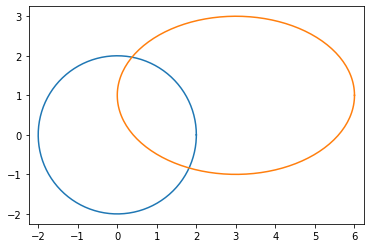

In [21]:
k=np.linspace(0, 2*np.pi, 200)

fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(xc(k), yc(k))
ax.plot(xe(k), ye(k))
plt.show()

The following system of equations needs to be solved for $t$ and $s$:

$$x_c = x_e \Leftrightarrow 2 \cos t - 3 - 3 \cos s = 0\\
y_c = y_e \Leftrightarrow 2 \sin t - 1 - 2 \sin s = 0$$

We write this as as $f(T) = 0$ with $f:\mathbf{R}^2\to \mathbf{R}^2$ and $T = (t,s)^T.$ The components of $f$ and the Jacobi matrix $J$ are

In [22]:
f = lambda T: np.array([2*np.cos(T[0]) - 3 - 3*np.cos(T[1]), 2*np.sin(T[0]) - 1 - 2*np.sin(T[1])])
J = lambda T: np.array([[-2*np.sin(T[0]), 3*np.sin(T[1])], [2*np.cos(T[1]), -2*np.cos(T[1])]])

We invoke the Newton-Raphson method to find one of the intersections, using an initial guess $x_0 = (1,3)^T:$

In [23]:
Ta = newtonr(f, np.array([1, 3]), 1e-9, J)
Ta

array([51.68737843, 64.8110887 ])

Finally we determine the Cartesian coordinates of the intersection by inserting $t=T$ into the equation for the circle (or equivalently, the ellipse):

In [24]:
xa = xc(Ta[0])
ya = yc(Ta[0])

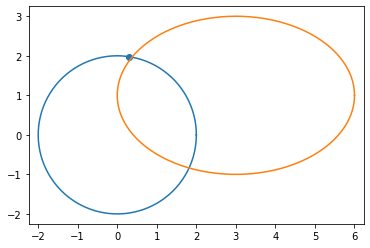

In [25]:
fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(xc(k), yc(k))
ax.plot(xe(k), ye(k))
ax.scatter(xa, ya)
plt.show()

For a different initial guess $x_0 = (0,4)^T$ we obtain the other intersection as well:

In [40]:
Tb = newtonr(f, [5, 4], 1e-9, J)
Tb

array([81.50530821, 50.75235833])

In [38]:
xb = xc(Tb[0])
yb = yc(Tb[0])

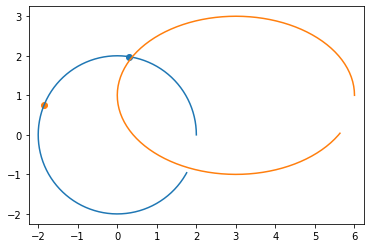

In [39]:
k=np.linspace(0, 2*np.pi-.5, 200)
fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(xc(k), yc(k))
ax.plot(xe(k), ye(k))
ax.scatter(xa, ya)
ax.scatter(xb, yb)
plt.show()